# Convolution

## Setting up the libraries

In [1]:
import math

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

from scipy import signal

## Linear Time Invariant Systems

A Linear Time Invariant (LTI) system, is a system having the following properties:

* **Linearity**: This means that if an input $x_1(t)$ gives an output $y_1(t)$ and an input of $x_2(t)$ gives an output of $y_2(t)$, then giving an input $\alpha x_1(t) + \beta x_2(t)$ to the system gives us an output of $\alpha y_1(t) + \beta y_2(t)$.

* **Time-Invariance**: If an input $x_1(t)$ produces an output of $y_1(t)$ then an input of $x_1(t - T)$ gives an output of $y_1(t - T)$. Intuitively, this means that a delay of the input function translates into a delay of the output function.

## Impulse Response

The **impulse response** of a system is defined as the output of the system given an impulse input. The impulse response is a time-domain representation that defines the behavior of the whole system and can then be used to calculate the output of a system given an arbitrary input.

In `scipy` the relevant function for getting the impulse response is `scipy.signal.impulse` which takes one to four arguments and inteprerts them differently depending on the number of arguments. In particular:

* If one argument is given, it is interperted as an LTI element

* If two arguments are given, they represent the numerators and denominators in of the transfer function (representation in the frequency domain) in descenting order

* Givem three arguments, they are assumed to represent the zeros, poles and gain of the system

* Finally for four arguments the function assumes the state-space representation as an input

Without delving into too much detail, the main reason why LTI systems play an important part when studying convolution is that we can express the behaviour of a system just by having the output of a single input (the impulse/Dirac delta function) - think this akin to the role of a basis in Linear Algebra.

If you are not familiar with the basics of control theory and the above don't make much sense, you don't need to worry about the particulars now since you won't encounter them in this tutorial.

Nevertheless, we can try to plot the impulse response of a system with a transfer function $\frac{s}{s^3 + 2s^2 + 2s + 1}$ (for those interested, this is the transfer function of a 3rd order Butterworth filter)

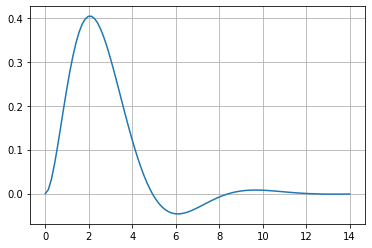

In [2]:
system = ([1.0], [1, 2, 2, 1])
t, y = signal.impulse(system)
plt.grid(True)
plt.plot(t, y)

To get the output of the filter, we can just convolve the input with the linear response (as mentioned above, this convenient fact is a resuly of the linearity and time-invariance of the system)

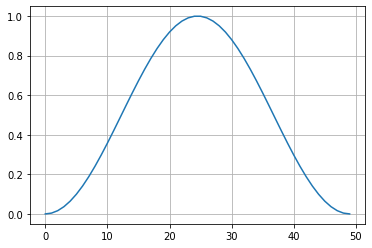

In [3]:
sig = signal.windows.hann(50)
plt.grid(True)
plt.plot(sig)


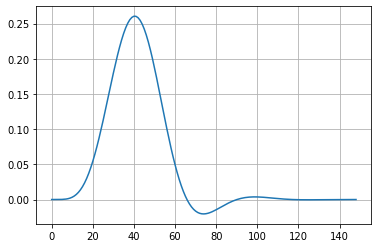

In [4]:
out = np.convolve(sig, y) / sum(sig)
plt.grid(True)
plt.plot(out)

##  But what is convolution?

Convolution is formally defined in textbooks as follows:

$$ (f*g) := \int_{-\infty}^\infty f(\tau)g(t-\tau)d\tau$$

Essentially this means that we convolve two functions $f$ and $g$ by flipping one and sliding it over the x axis. Convolution can be thought of as a way to "multiply" two functions but instead of just taking a simple dot product, we also take into account the previous values - think about how filters work. 

The discrete case is as expected:

$$(f*g)[n] = \Sigma_{m=0}^{N-1}f[m]g[n-m]$$

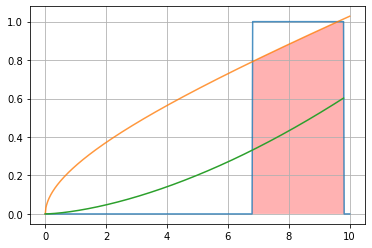

In [5]:
fig, ax = plt.subplots()

Ny = 500 # samples in y axis
ymax = 10

tmax = 100 #frames

plt.rcParams['grid.alpha'] = 0.5
plt.rcParams['grid.color'] = "#cccccc"
plt.grid(True)


y = np.linspace(0, ymax, Ny)
t = np.linspace(0, tmax)
wmins = 0
wmax = 30

# Window function
def window(x, mins = wmins, maxs = wmax):
    return mins < x < maxs
    
# Signal function
def func(x):
    return math.e**np.sqrt(x/20) - 1

vwin = np.vectorize(window)

window_plot, = plt.plot(y, vwin(y), alpha = 0.8)
funcs = func(y)

plt.plot(y, funcs, alpha = 0.8)

filtered = np.convolve(vwin(y), func(y)) / sum(vwin(y)) # normalization for plotting
filtered_plot, = plt.plot(y, filtered[:500])

# cfill = plt.fill_between()

s = ymax/len(t)

def animate(i):
    wmins = -3 + s*i
    wmax = 0 + s*i
    twind = vwin(y, wmins, wmax)
    window_plot.set_ydata(twind)
    
    ax.collections.clear()
    ax.fill_between(y, np.minimum(twind, funcs), facecolor='red', alpha = 0.3)
    
    ti = (i*tmax)//ymax
    
    filtered_plot.set_xdata(y[:ti])
    filtered_plot.set_ydata(filtered[:ti])
    
ani = matplotlib.animation.FuncAnimation(fig, animate, frames=len(t))
HTML(ani.to_jshtml())

### Your turn

Try to perform the same operation by sliding `func` over the x axis instead. What changes do you need to implement?

Remember that convolution is commutative!